In [173]:
import numpy as np
from matplotlib import pyplot as plt

# Zadanie 1

In [249]:
class DeterministicAutomaton:    
    def __init__(self, width=100, height=100, init_density=0.5, rule=184, seed=None):
        self.width = width
        self.height = height
        self.init_density = init_density
        self.seed = seed
        
        self.rule_dict = DeterministicAutomaton._generate_rule_dict(rule)

        self.rows = np.empty((height, width), dtype=np.int8)
        self.rows[0] = self._init_row()
    
    def fill_rows(self):
        for row in range(1, self.height):
            self.rows[row] = self._apply_rule(self.rows[row - 1])
        
    def _init_row(self):
        n = int(self.width * self.init_density)
        row = np.zeros(self.width).astype(np.int8)
        row[:n] = 1
        np.random.seed(self.seed)
        return np.random.permutation(row)
    
    def _apply_rule(self, row):
        new_row = np.empty(self.width, dtype=np.int8)
        for i in range(self.width):
            new_row[i] = self._rule_fun((row[i-1], row[i], row[(i+1) % self.width]))
        return new_row
    
    def _rule_fun(self, x):
        return self.rule_dict[x]
    
    @staticmethod
    def _generate_rule_dict(rule):
        rule_arr = list(reversed([int(a) for a in np.binary_repr(rule, width=8)]))
        rule_dict = {}
        for i in range(8):
            rule_dict[tuple(int(a) for a in np.binary_repr(i, width=3))] = rule_arr[i]
        return rule_dict

In [250]:
def test_det_automaton(init_density):
    A = DeterministicAutomaton(width=500, height=500, init_density=init_density, seed=40)
    A.fill_rows()

    plt.imshow(A.rows, cmap='Greys')
    plt.title(f'Density: {init_density}')
    plt.show()

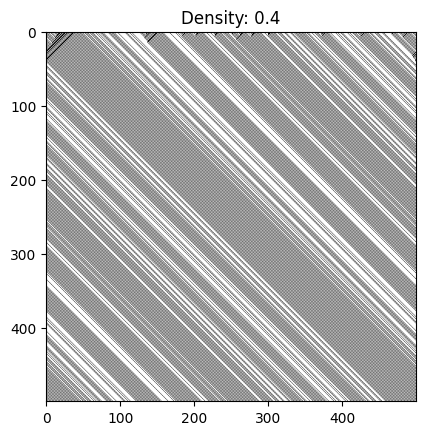

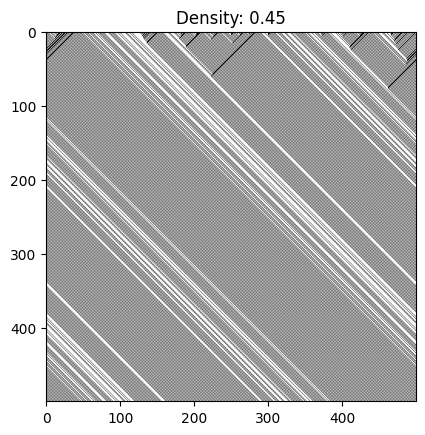

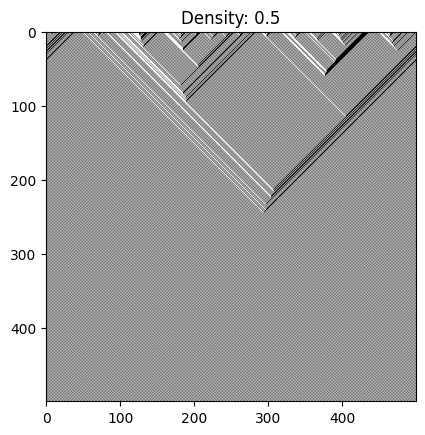

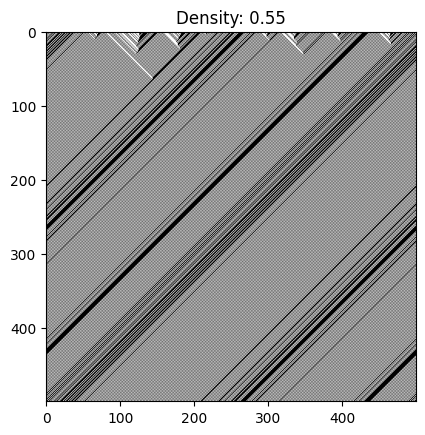

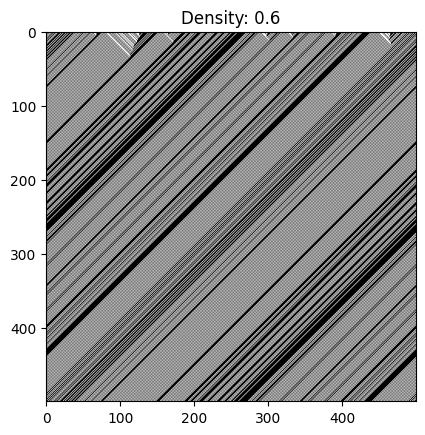

In [251]:
for density in [0.4, 0.45, 0.5, 0.55, 0.6]:
    test_det_automaton(density)

# Zadanie 2

In [273]:
class NSAutomaton(DeterministicAutomaton):
    def __init__(self, L=100, iterations=100, vmax=2, p=0.2, car_density=0.3, seed=None):
        self.L = L
        self.iterations = iterations
        self.vmax = vmax
        self.p = p
        self.car_density = car_density
        self.seed = seed
        
        self.states = np.empty((iterations, L), dtype=np.int8)
        self.states[0] = self._init_state()
        
    def fill_states(self):
        for s in range(1, self.iterations):
            self.states[s] = self._apply_turn(self.states[s - 1])
        
    def _init_state(self):
        n = int(self.L * self.car_density)
        row = np.full(self.L, -1).astype(np.int8)
        row[:n] = 0
        np.random.seed(self.seed)
        return np.random.permutation(row)
    
    def _apply_first_rule(self, state):
        new_state = np.full(self.L, -1).astype(np.int8)
        
        # Find the last car
        last_car = self.L - 1
        while last_car >= 0 and state[last_car] == -1:
            last_car -= 1
            
        # Process all the car except for the last one
        i = last_car - 1
        dist = 1
        while i >= 0:
            if state[i] == -1: # not a car
                dist += 1
            else: # car
                new_state[i] = min(state[i] + 1, dist - 1, self.vmax)
            i -= 1
            
        # Process the last car
        dist += self.L - last_car
        new_state[last_car] = min(state[last_car] + 1, dist - 1, self.vmax)
        
        return new_state
        
    def _apply_second_rule(self, state):
        new_state = np.full(self.L, -1).astype(np.int8)
        for i in range(self.L):
            if state[i] != -1:
                if np.random.uniform() < self.p:
                    new_state[i] = max(state[i] - 1, 0)
        
        return new_state
                    
    def _apply_move(self, state):
        new_state = np.full(self.L, -1).astype(np.int8)
        for i in range(self.L):
            if state[i] != -1:
                new_pos = i + state[i]
                new_state[new_pos] = state[i]
        return new_state
                
    def _apply_turn(self, state):
        state = self._apply_first_rule(state)
        state = self._apply_second_rule(state)
        return self._apply_move(state)

In [279]:
A = NSAutomaton(10, 10)
A.fill_states()

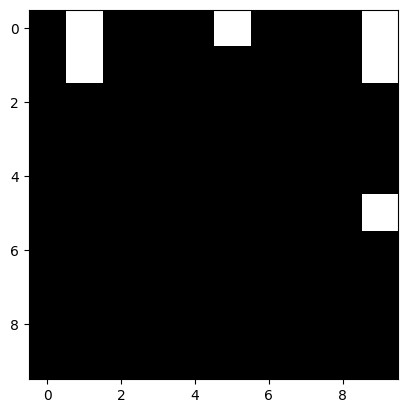

In [280]:
plt.imshow(A.states, cmap='gray')
# plt.title(f'Density: {init_density}')
plt.show()